# Support Vector Machine (SVM)

The main idea of the SVM is to find the maximally separating hyperplane



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd

### Psuedo Algorithm:

```
function fit():
    Find max_feature_value, min_feature_value in dataset # O(len(dataset))
    step_size = [10%, 1%, 0.1%, ...] * max_feature_value 
    FOR each step in step_sizes:
        weights <- [latest_optimum, latest_optimum]    
        FOR weight from [latest_optimum_upper, latest_optimum_upper] to
                                [latest_optimum_lower,latest_optimum_lower], 
                                                space = -[step, step]  
                                                # O((upper - lower)/space)
            FOR each bias in [-k,k]: # O(2k)
                Tranforming weights to w_t # O(transforms)
                If yi(w_t * xi + bias) >=1 for all (xi, yi): # O(len(dataset))
                    opt_dict <- {||w|| : [w_t,bias]}
        Find the minimum ||w|| in opt_dict # O(len(opt_dict))
        weights, bias = opt_dict[minimum ||w||]
        latest_optimum_upper = weights + step * 2
        latest_optimum_lower = weights - step * 2
        
```
Total complexity: (not exact
O((upper - lower)/space * 2k * transforms * len(dataset))

In [3]:
class SVM:
    def __init__(self, visualization = 'opt'):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization == 'opt':
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
#             self.ax.set_color_cycle(['red', 'black', 'yellow'])
        elif self.visualization == 'all':          
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
#             self.ax.set_prop_cycle(color=['red', 'green', 'blue']) 
            
    def draw_background(self):
        if self.visualization == 'opt':
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        elif self.visualization == 'all':
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def predict(self, features): # Input features
        def sign(x):
            return -1 if x < 0 else (1 if x > 0 else 0)
        classification = sign(np.dot(features, self.weights) + self.bias)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', \
                            color = self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')            
        return classification
    def visualize(self, label = ' '):
        [[self.ax.scatter\
          (x[0], x[1], s = 100, color = self.colors[yi]) 
                                            for x in data_dict[yi]] 
                                            for yi in data_dict.keys()]
        rgb = np.random.rand(3,)    
        def hyperplane(x1, w, b, v):
            # v = wx + b
            return (-w[0]*x1 - b + v) / w[1] # known x1 => find x2
        
        hyp_min_x = self.min_feature_value * 0.9
        hyp_max_x = self.max_feature_value * 1.1
        
        # positive support vextor hyperplane
        # w*x + b = 1
        psv1 = hyperplane(hyp_min_x, self.weights, self.bias, 1)
        psv2 = hyperplane(hyp_max_x, self.weights, self.bias, 1)
        self.ax.plot([hyp_min_x, hyp_max_x], [psv1, psv2], '-', color = rgb)
        
        # negative support vector hyperplane
        # w*x + b = -1
        nsv1 = hyperplane(hyp_min_x, self.weights, self.bias, -1)
        nsv2 = hyperplane(hyp_max_x, self.weights, self.bias, -1)
        self.ax.plot([hyp_min_x, hyp_max_x], [nsv1, nsv2], '-', color = rgb)
        
        # decision boundary
        # w*x + b = 0
        db1 = hyperplane(hyp_min_x, self.weights, self.bias, 0)
        db2 = hyperplane(hyp_max_x, self.weights, self.bias, 0)
        self.ax.plot([hyp_min_x, hyp_max_x], [db1, db2], '--', label =label, color = rgb)
        
    def fit(self, dataset):
        self.dataset = dataset
        
        # optimization dictionary
        # xi.w + b <= -1 if yi = -1 (belongs to -ve class)
        # xi.w + b >= +1 if yi = +1 (belongs to +ve class)
        # ==> yi(xi.w+b) >= 1
        opt_dict ={} # {||w|| : [w,b]} where ||w|| = dist(margin, point)}
        
        # Linearly transforming the weights to find best fit (~ kernel method)
#         transforms = [[1, 1],
#                      [-1, 1],
#                      [1, -1],
#                      [-1, -1]]
        # The more complicated transforming, the more precise the optimum is
        transforms = [[1, 1],
                     [-1, 1],
                     [1, -1],
                     [-1, -1],
                     [1, 0.5],
                     [1, -0.5],
                     [-1, .5],
                     [-1, -.5],
                     [0.5, 1],
                     [.5, -1],
                     [-.5, 1],
                     [-.5, -1]]
        all_data = []
        
        for yi in self.dataset.keys():
            for features in self.dataset[yi]:
                for feature in features:
                    all_data.append(features)
        self.max_feature_value = np.max(all_data)
        self.min_feature_value = np.min(all_data)
        # no need to keep this memory.
        all_data=None
        
        # Depend on how precise you want to get
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01]
                      # starts getting very high cost after this.
#                       self.max_feature_value * 0.001]
#                      self.max_feature_value * 0.0001,]
        
        # extremely expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value*0.5
        latest_optimum_lower = 0
        
        for step in step_sizes: # 3
            w = np.array([latest_optimum, latest_optimum])
            # Convex ??
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                                self.max_feature_value * b_range_multiple,
                                step * b_multiple): # loop to find best bias
                    for transform in transforms: # loop to find best weights
                        w_t = w * transform
                        found_option = True 
                        # weakest link in the SVM fundamentally ?
                        # SMO fixed this a bit
                        for yi in self.dataset.keys():
                            for xi in self.dataset[yi]:
                                # yi(xi*w + b) >=1
                                if not yi*(np.dot(xi, w_t) + b) >=1: # if one case not 
                                                                     # satisfy => break all 
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < latest_optimum_lower: # Heuristic, [w] from [latest_optimum] to 0 is enough to train
                    optimized = True
                    print ('Optimize a step')
                else:
                    w = w - step # Move to local optimum
                    
            # Find the minimum ||w||
            norm = sorted([x for x in opt_dict.keys()])
            print(norm[0], opt_dict[norm[0]])
            opt_params = opt_dict[norm[0]]
            self.weights = opt_params[0] # w_t
            self.bias = opt_params[1] # b
            
            # Constraint weightRange around local optimum
            latest_optimum = np.abs(opt_params[0][0]) + 2* step
#             latest_optimum = opt_params[0][0] + 2* step
            latest_optimum_lower = latest_optimum - 4*step 
            
            # Visualize each step
            if self.visualization == 'all':
                print('boundary weights', [latest_optimum_lower,latest_optimum])
                print("x*w +b:")
                for yi in self.dataset.keys():
                    for xi in self.dataset[yi]:
                        print(xi,':',np.dot(xi, self.weights) + self.bias) # if one case not 

                self.visualize(str(step))
                self.ax.legend()

Optimize a step
1.6770509831248424 [array([-0.75, -1.5 ]), 2.5]
Optimize a step
0.7826237921249254 [array([-0.35, -0.7 ]), 1.0]


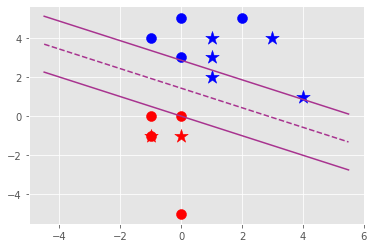

In [4]:
data_dict = {
    -1: np.array([[0,5],[2,5],[0,3],[-1,4]]),
    1: np.array([[0,0],[-1,-1],[0,-5],[-1,0]])
}

model = SVM(visualization='opt')
model.fit(data_dict)
test_set = [
    [1,2],
    [1,3],
    [4,1],
    [3,4],
    [1,4],
    [0,-1],
    [-1,-1]
]
for feature in test_set:
    model.predict(feature)
model.visualize() 

In [5]:
import pandas as pd

df = pd.read_csv('data/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

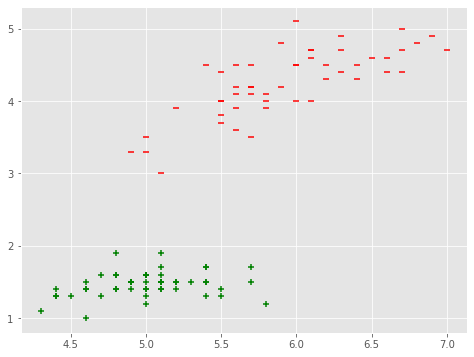

Optimize a step
3.1304951684997055 [array([-1.4,  2.8]), 0.0]
Optimize a step
2.504396134799766 [array([-1.12,  2.24]), 1.4210854715202004e-13]


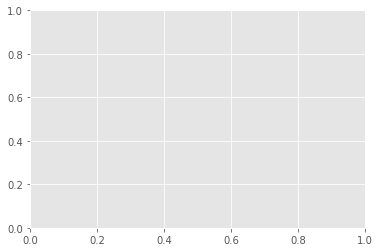

In [6]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x1 = x[:50]
setosa_x2 = y[:50]

versicolor_x1 = x[50:]
versicolor_x2 = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x1,setosa_x2,marker='+',color='green')
plt.scatter(versicolor_x1,versicolor_x2,marker='_',color='red')
plt.show()

data_dict = {
    -1: [[x1, x2] for x1, x2 in zip(setosa_x1,setosa_x2)],
    1: [[x1, x2] for x1, x2 in zip(versicolor_x1,versicolor_x2)]
}

svm = SVM()
svm.fit(data_dict)


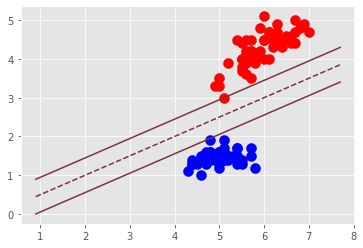

In [7]:
svm.draw_background()
svm.visualize()

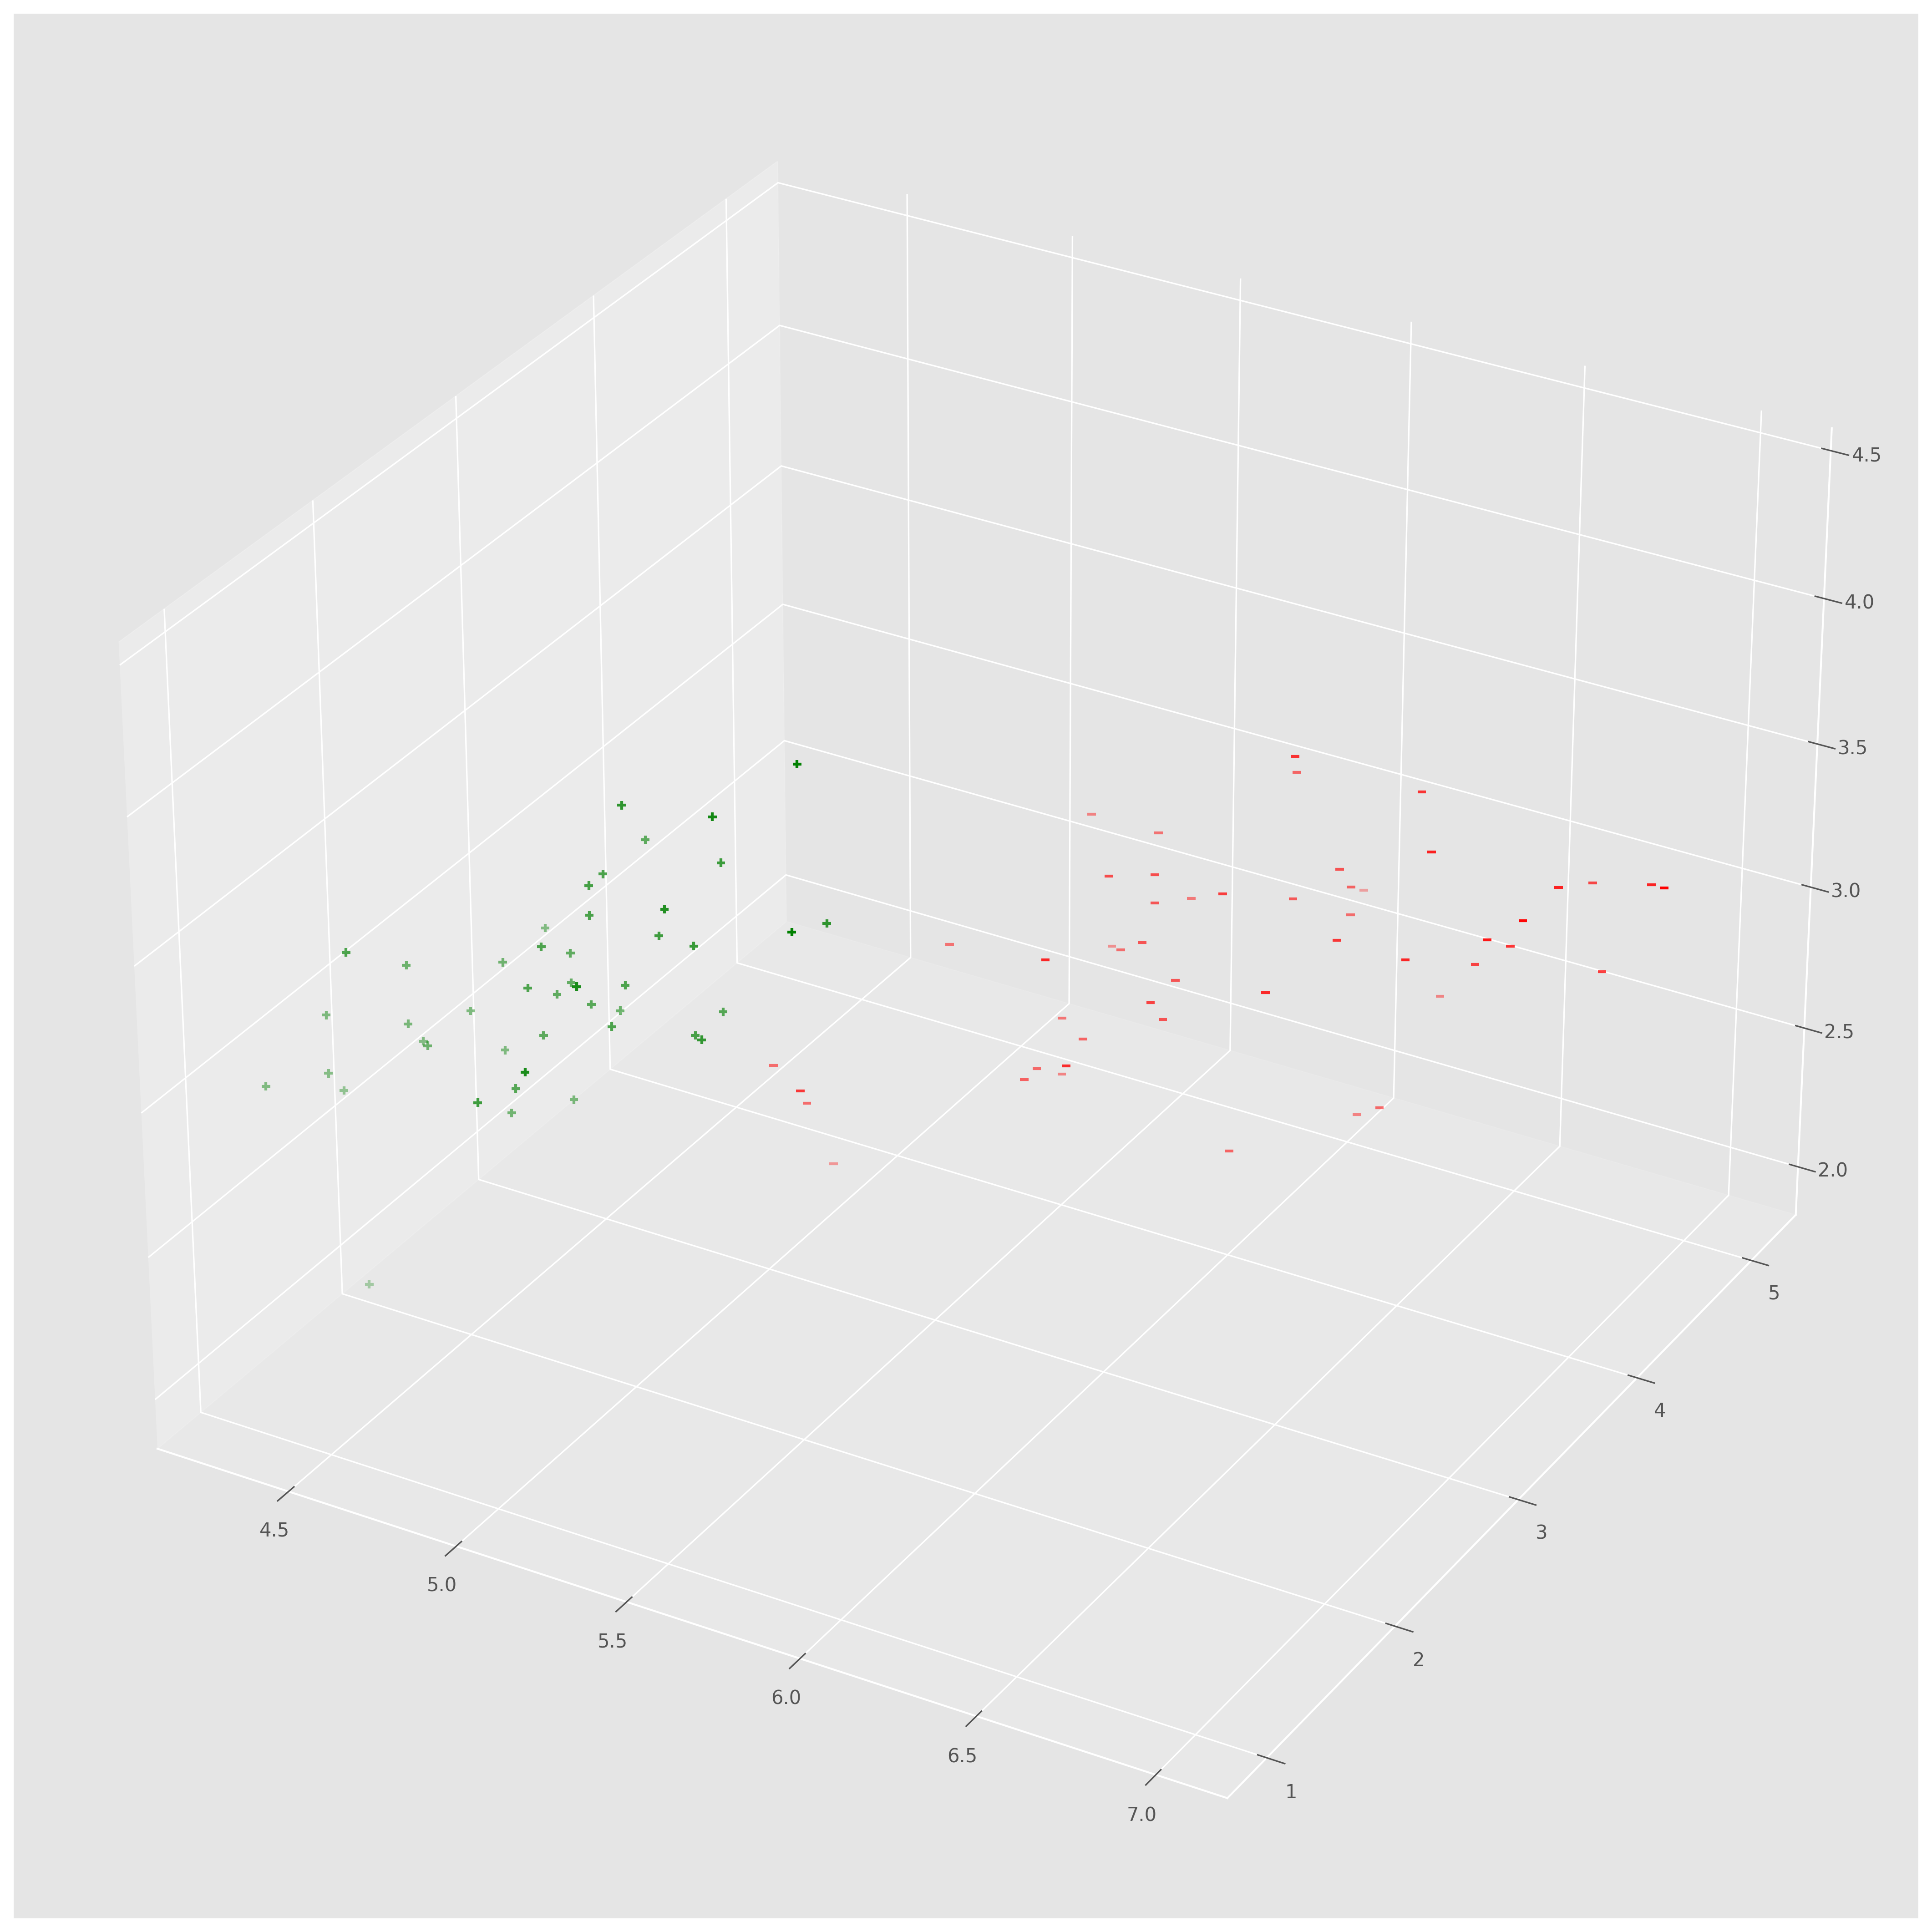

In [9]:

fig = plt.figure(figsize=(18, 20), dpi=300)
ax = fig.add_subplot(111, projection='3d')


x = df['SepalLengthCm']
y = df['PetalLengthCm']
z = df['SepalWidthCm']

setosa_x1 = x[:50]
setosa_x2 = y[:50]
setosa_x3 = z[:50]

versicolor_x1 = x[50:]
versicolor_x2 = y[50:]
versicolor_x3 = z[50:]

ax.scatter(setosa_x1,setosa_x2, setosa_x3, marker='+',color='green')
ax.scatter(versicolor_x1,versicolor_x2,versicolor_x3, marker='_',color='red')
plt.show()

In [65]:
class SVM3D:
    def __init__(self, visualization = 'opt'):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization is not None:
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
            
    def draw_background(self):
        if self.visualization is not None:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(111, projection='3d')
            
    def predict(self, features): # Input features
        def sign(x):
            return -1 if x < 0 else (1 if x > 0 else 0)
        classification = sign(np.dot(features, self.weights) + self.bias)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', \
                            color = self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')            
        return classification
    def visualize(self, label = ' '): # -> 3D
        [[self.ax.scatter\
          (x[0], x[1], x[2], s = 100, color = self.colors[yi]) 
                                            for x in data_dict[yi]] 
                                            for yi in data_dict.keys()]
        rgb = np.random.rand(3,)    
        def hyperplane(x1, x2, w, b, v):
            # v = wx + b
            return (-w[0]*x2 - w[1]*x1 - b + v) / w[2] # known x1 => find x2

        hyp_x = np.arange(self.min_feature_value, self.max_feature_value, .1)
        hyp_y = np.arange(self.min_feature_value, self.max_feature_value, .1)
        
        (hyp_x, hyp_y) = np.meshgrid(hyp_x, hyp_y)
        # positive support vextor hyperplane
        # w*x + b = 1
        hyp_z_psv = hyperplane(hyp_x, hyp_y, self.weights, self.bias, 1)
        self.ax.plot_surface(hyp_x, hyp_y, hyp_z_psv, color = rgb)
        # negative support vector hyperplane
        # w*x + b = -1
        hyp_z_nsv = hyperplane(hyp_x, hyp_y, self.weights, self.bias, -1)
        self.ax.plot_surface(hyp_x, hyp_y, hyp_z_nsv, color = rgb)
        # decision boundary
        # w*x + b = 0
        hyp_z_db = hyperplane(hyp_x, hyp_y, self.weights, self.bias, 0)
        self.ax.plot_surface(hyp_x, hyp_y, hyp_z_db, color = rgb, label = label)

    def fit(self, dataset): # -> 3D
        self.dataset = dataset
        opt_dict ={} # {||w|| : [w,b]} where ||w|| = dist(margin, point)}
        transforms = [[1, 1, 1],
                      [1, 1, -1],
                      [1, -1, 1],
                      [1, -1, -1],
                      [-1, 1, 1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [-1, -1, -1]
                     ]
        all_data = []
        for yi in self.dataset.keys():
            for features in self.dataset[yi]:
                for feature in features:
                    all_data.append(features)
        self.max_feature_value = np.max(all_data)
        self.min_feature_value = np.min(all_data)
        all_data=None
        
        # Depend on how precise you want to get
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01]
        # extremely expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        latest_optimum_lower = 0

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value * b_range_multiple),
                                self.max_feature_value * b_range_multiple,
                                step * b_multiple): # loop to find best bias
                    for transform in transforms: # loop to find best weights
                        w_t = w * transform
                        found_option = True 
                        for yi in self.dataset.keys():
                            for xi in self.dataset[yi]:
                                if not yi*(np.dot(xi, w_t) + b) >=1: # if one case not 
                                                                     # satisfy => break all 
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < latest_optimum_lower: # Heuristic, [w] from [latest_optimum] to 0 is enough to train
                    optimized = True
                    print ('Optimize a step')
                else:
                    w = w - step # Move to local optimum
                    
            # Find the minimum ||w||
            norm = sorted([x for x in opt_dict.keys()])
            print(norm[0], opt_dict[norm[0]])
            opt_params = opt_dict[norm[0]]
            self.weights = opt_params[0] # w_t
            self.bias = opt_params[1] # b
            
            # Constraint weightRange around local optimum
            latest_optimum = np.abs(opt_params[0][0]) + 2* step
            latest_optimum_lower = latest_optimum - 4*step 
            
            # Visualize each step
            if self.visualization == 'all':
                print('boundary weights', [latest_optimum_lower,latest_optimum])
                print("x*w +b:")
                for yi in self.dataset.keys():
                    for xi in self.dataset[yi]:
                        print((xi, yi),':',np.dot(xi, self.weights) + self.bias)
                self.visualize()

Optimize a step
3.6373066958944156 [array([ 2.1,  2.1, -2.1]), -10.5]
Optimize a step
1.9398969044769208 [array([ 1.12,  1.12, -1.12]), -5.249999999999879]


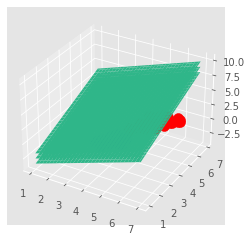

In [67]:
data_dict = {
    -1: [[x1, x2, x3] for x1, x2, x3 in zip(setosa_x1,setosa_x2, setosa_x3)],
    1: [[x1, x2, x3] for x1, x2, x3 in zip(versicolor_x1,versicolor_x2, versicolor_x3)]
}

svm3d = SVM3D(visualization= 'opt')
svm3d.fit(data_dict)
svm3d.visualize()

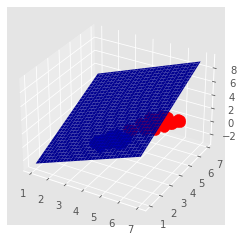

In [57]:
# svm3d = SVM3D(visualization= 'all')
svm3d.draw_background()
svm3d.visualize()

## Ref

Youtube Link: (watch 20 - 33)
https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/